In [4]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [5]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [6]:
from   schechter         import schechter

In [7]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived.fits')
derived

TARGETID,ROSETTE,BGSZWEIGHT,VOLUME,MRH,ZMAX,VMAX,VONVMAX
float64,float64,float64,float64,float64,float64,float64,float64
3.9627733927462344e+16,-1.0,1.0120848417282104,1587205938.226813,-19.881173918302483,0.21445029728502413,1751150191.2628093,0.9063791022300772
3.962773392746358e+16,-1.0,1.0099681615829468,1062135142.7444754,-20.70733488751636,0.29628868288639787,5323347915.829818,0.19952390103717407
3.962773392746381e+16,-1.0,1.0021929740905762,1078294036.807503,-21.046547705446496,0.3332149454558418,8036253965.413615,0.13417869089855283
3.9627733927464616e+16,-1.0,1.0001806020736694,20504846.539446913,-19.680466316967664,0.19446983251551314,1258452404.9120433,0.016293700468457566
3.962773392746479e+16,-1.0,1.0094077587127686,3671183560.927993,-20.737353369447934,0.29644961910733025,5333441628.708148,0.688332940810157
3.962773392746541e+16,-1.0,1.0092251300811768,3210213246.6705976,-20.714648935395925,0.29262655902175044,5097454651.457259,0.629767887342139
3.962773392746584e+16,-1.0,1.0278266668319702,6360413115.181655,-20.92749320908252,0.32988940538656114,7757216253.891779,0.8199350007795192
3.962773393165839e+16,-1.0,1.002821922302246,321068872.47894186,-20.376518938389612,0.2757939624700396,4148911106.5300975,0.07738629829248493
3.962773393585003e+16,-1.0,1.0646191835403442,5051541687.274428,-21.800309591388178,0.44274519177708177,22158184559.31494,0.2279763341510233


In [8]:
derived['PHIKERNEL']   = 1. / derived['VMAX']
# derived['PHIKERNEL'] = derived['BGSZWEIGHT'] / derived['VMAX']

In [12]:
derived['MRH_IDX']     = np.digitize(derived['MRH'], bins=np.arange(-24.0, -14.0, 0.5))

derived_grouped        = derived.group_by(['MRH_IDX'])
derived_addbinned      = derived_grouped['BGSZWEIGHT', 'MRH', 'PHIKERNEL'].groups.aggregate(np.add)
derived_mnbinned       = derived_grouped['BGSZWEIGHT', 'MRH', 'PHIKERNEL'].groups.aggregate(np.mean)

Text(0, 0.5, '$\\Phi(M_r - 5\\log_{10}|h|)$')

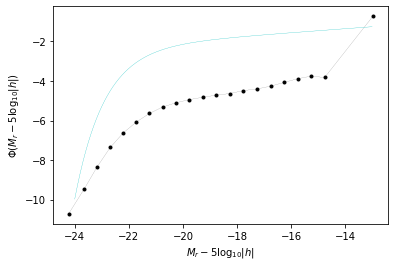

In [17]:
Ms                     = np.arange(-24., -13., 0.01)

pl.plot(derived_mnbinned['MRH'], np.log10(derived_addbinned['PHIKERNEL']), marker='.', c='k', lw=0.1)
pl.plot(Ms, np.log10(schechter(Ms)), c='c', lw=0.25)

pl.xlabel(r'$M_r - 5\log_{10}|h|$')
pl.ylabel(r'$\Phi(M_r - 5\log_{10}|h|)$')

# Done.